In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

from sklearn.decomposition import FastICA, PCA
from scipy import stats

In [23]:
# Generate data
# Taken from https://scikit-learn.org/stable/auto_examples/decomposition/plot_ica_blind_source_separation.html
np.random.seed(0)
n_vols = 2000
n_voxels = 10
time = np.linspace(0, 8, n_vols)

s1 = np.sin(2 * time)  # Signal 1 : sinusoidal signal
s2 = np.sign(np.sin(3 * time))  # Signal 2 : square signal
s3 = signal.sawtooth(2 * np.pi * time)  # Signal 3: saw tooth signal

S = np.stack((s1, s2, s3)).T
S += 0.2 * np.random.normal(size=S.shape)  # Add noise
n_signals = S.shape[1]

S /= S.std(axis=0)  # Standardize data
# Mix data
weights = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]).T  # Mixing matrix
weights = np.random.random((n_signals, n_voxels)) * np.random.randint(1, 5, size=n_voxels)
data = np.dot(S, weights)  # Generate observations

data_z = stats.zscore(data, axis=0)

In [26]:
# Compute ICA
ica = FastICA(n_components=4)
ica_comp_ts = ica.fit_transform(data)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

# We can `prove` that the ICA model applies by reverting the unmixing.
#assert np.allclose(data, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = PCA(n_components=4)
pca_comp_ts = pca.fit_transform(data)  # Reconstruct signals based on orthogonal components

pca_comp_ts_z = stats.zscore(pca_comp_ts, axis=0)
ica_comp_ts_z = stats.zscore(ica_comp_ts, axis=0)

In [29]:
true_varex = pca.explained_variance_ratio_

array([8.66131675e-01, 8.02350519e-02, 5.36332733e-02, 2.00072336e-32])

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


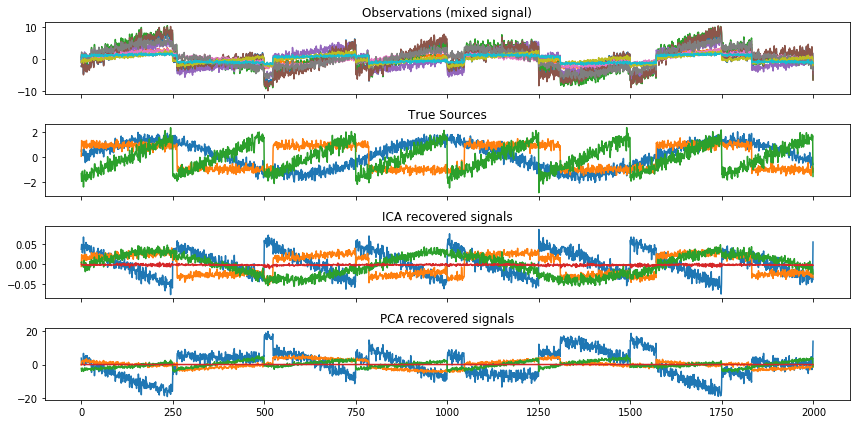

In [27]:
# #############################################################################
# Plot results

fig, axes = plt.subplots(nrows=4, sharex=True, figsize=(12, 6))
models = [data, S, ica_comp_ts, pca_comp_ts]
names = ['Observations (mixed signal)',
         'True Sources',
         'ICA recovered signals',
         'PCA recovered signals']

for ii, (model, name) in enumerate(zip(models, names)):
    axes[ii].set_title(name)
    for sig in model.T:
        axes[ii].plot(sig)

fig.tight_layout()
fig.show()

In [35]:
def compute_varex_tedana(data, mixing):
    assert data.shape[0] == mixing.shape[0]
    mixing_mc = mixing - np.mean(mixing, axis=0, keepdims=True)
    betas = np.linalg.lstsq(mixing_mc, data, rcond=None)[0]
    varex = betas ** 2
    return varex

def other():
    tsoc_betas, res = np.linalg.lstsq(mmix_z, tsoc_z.T, rcond=None)[:2]
    tsoc_betas = tsoc_betas.T
    comp_varex = tsoc_betas ** 2
    residuals = (tsoc_z - np.dot(tsoc_betas, mmix_z.T))
    temp_residuals = residuals ** 2
    sse = np.sum(temp_residuals, axis=1)
    varunexpl2 = sse / n_vols
    varunexpl = np.var(residuals, axis=1)
    varex_percent_maps = comp_varex / tot_var[:, None]
    varex_percent = np.mean(varex_percent_maps, axis=0) * 100

In [37]:
a = compute_varex_tedana(data, ica_comp_ts)

In [41]:
a.mean(axis=1)

array([1521.69479366, 2873.60370455, 3336.04300557, 1654.57110701])